In [37]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astrocut import fits_cut

cmap = plt.get_cmap('inferno')
cmap.set_bad('k')

import warnings; warnings.simplefilter('ignore')


You will have used `bash ../data/MAST_2024-07-03T0023` to download the datasets - this should create a directory `..data/MAST_2024-07-03T0023/HST/` with many subdirectories, each of which contains a dataset. Let's explore one of these.

In [16]:
ddir = '../data/MAST_2024-07-03T0023/'
fname = ddir + 'HST/n8yj11020/n8yj11020_mos.fits'

data = fits.getdata(fname, ext=1)

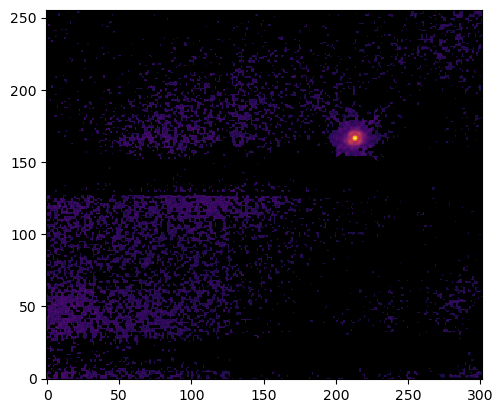

In [17]:
plt.imshow(data**0.25,cmap=cmap,origin='lower'); 

In [ ]:
hdr = fits.getheader(fname, ext=0) # this is the overall header - with lots of metadata
print(hdr)

In [ ]:
metadata = { # this is the main subset of metadata we care about from the header 
    'tel'    : hdr['TELESCOP'],         # telescope - should be HST
    'fname'  : hdr['FILENAME'],         # original file name
    'odate'  : hdr['DATE-OBS'],         # UTC date of observation
    'otime'  : hdr['TIME-OBS'],         # UTC time of observation
    'tint'   : hdr['EXPTIME' ],         # integration time (sec)
    'filter' : hdr['FILTER'],           # filter name - should be F110W, or F170W
    'RA'     : hdr['RA_TARG' ],         # right ascension (deg)
    'DEC'    : hdr['DEC_TARG'],         # declination (deg)
    'wavel' : hdr['PHOTPLAM']*1e-10, # central wavelength (meters)
    'orient' : hdr['ORIENTAT'] # P.A. of image y axis (deg e. of n.)
    }

print(metadata)

In [ ]:
image_hdr = fits.getheader(fname, ext=1) # this is the header for just the image in particular

# rather than manipulate WCS coordinates ourselves, can use https://docs.astropy.org/en/stable/wcs/
w = WCS(image_hdr)

Let's crop this to something more manageable in size.

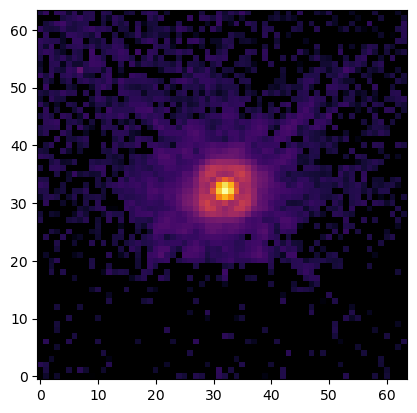

In [50]:
# get brightest pixel coordinates
y,x = np.unravel_index(np.argmax(data),data.shape)
centre = SkyCoord(w.pixel_to_world(x,y), unit='deg') # astropy wants to keep track of units


# use fits_cut because we want WCS metadata cropped appropriately
cutout = fits_cut(fname, centre, 64, single_outfile=False, memory_only=True)[0] 
cropped = cutout[1].data
cropped_image_hdr = cutout[1].header

plt.imshow(cropped**0.25,cmap=cmap,origin='lower');